In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

sns.set_style("whitegrid")

In [2]:
df = pd.read_pickle('../GITIGNORE_DATA/lookup_result.pkl')

df.head(2)

,LINK_ID,PREFERRED_NAME,TITLE_NAME,FIRSTMID_NAME,LASTSUFF_NAME,SUFFIX_NAME,HONORARY_SUFFIX,GENDER,BRIEF_BIO,DESCRIPTION,NOTE,BIRTH_DATE,BIRTH_PLACE,DEATH_DATE,DEATH_PLACE,CAUSE_OF_DEATH,NATIONALITY,OCCUPATION,WEBSITE,AFFILIATION,LINGUISTIC_GROUP,TYPE,REFERENCE_NUMBER,SOURCE,CREATE_DATE,UPDATE_DATE,res_ALL_NOTES,res_WIKIDATA_IDs,res_URLS
0,10243,Brooklyn Arms Company,NaN,NaN,Brooklyn Arms Company,NaN,NaN,N,Y,nan,object record: 1987-1020,c. 1870,"Brooklyn, New York, New York state, United States",NaN,NaN,NaN,American,manufacturer of mathematical instruments,NaN,NaN,NaN,NaN,NaN,N,28-JAN-98,06-NOV-18,nan --- object record: 1987-1020,[],[]
1,10245,"Zenthon, Edward Rupert",NaN,Edward Rupert,Zenthon,NaN,NaN,M,Y,REF: http://www.iwm.org.uk/collections/item/object/1030031461,nan,1920-07,"London, Greater London, England, United Kingdom",c. 2002,NaN,NaN,British,engineer,NaN,NaN,NaN,NaN,NaN,N,28-JAN-98,05-AUG-15,REF: http://www.iwm.org.uk/collections/item/object/1030031461 --- nan,[],[http://www.iwm.org.uk/collections/item/object/1030031461]


### What % of records have a potential link?

In [3]:
df['no_URLs'] = df['res_URLS'].apply(len)
df['no_WIDs'] = df['res_WIKIDATA_IDs'].apply(len)

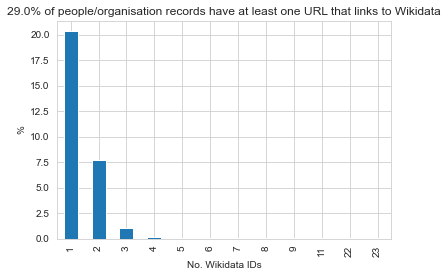

In [4]:
vc_norm = (df.no_WIDs.value_counts().sort_index()/len(df)*100)
ax = vc_norm[vc_norm.index>=1].plot(kind='bar')
ax.set_title(f"{round(vc_norm[vc_norm.index >=1].sum())}% of people/organisation records have at least one URL that links to Wikidata");
ax.set_xlabel("No. Wikidata IDs")
ax.set_ylabel("%");

### Are there shared Wikidata IDs between people?

In [5]:
ids_ohe = df["res_WIKIDATA_IDs"].str.join('|').str.get_dummies()

In [6]:
ohe_sum = ids_ohe.sum()
shared_ids = ohe_sum[ohe_sum > 1].index.tolist()

In [7]:
# proportion of IDs that are in more than one record
len(shared_ids), len(shared_ids) / ids_ohe.shape[1]

(270, 0.05976095617529881)

In [8]:
shared_ids_ohe = ids_ohe[shared_ids].sum(axis=1)
people_w_shared_ids = shared_ids_ohe[shared_ids_ohe == 1].index

In [9]:
# number of occurrences of top shared wikidata IDs
ohe_sum.sort_values(ascending=False)

Q18527717    10
Q8040425      9
Q16065503     8
Q15994848     8
Q18671097     8
             ..
Q5380703      1
Q537906       1
Q537504       1
Q537074       1
Q1009242      1
Length: 4518, dtype: int64

In [10]:
# search for items that mention a specific qcode
qcode = "Q18527717"
df[df['res_WIKIDATA_IDs'].astype(str).str.contains(qcode)]

,LINK_ID,PREFERRED_NAME,TITLE_NAME,FIRSTMID_NAME,LASTSUFF_NAME,SUFFIX_NAME,HONORARY_SUFFIX,GENDER,BRIEF_BIO,DESCRIPTION,NOTE,BIRTH_DATE,BIRTH_PLACE,DEATH_DATE,DEATH_PLACE,CAUSE_OF_DEATH,NATIONALITY,OCCUPATION,WEBSITE,AFFILIATION,LINGUISTIC_GROUP,TYPE,REFERENCE_NUMBER,SOURCE,CREATE_DATE,UPDATE_DATE,res_ALL_NOTES,res_WIKIDATA_IDs,res_URLS,no_URLs,no_WIDs
2609,41592,"Dollond, John",NaN,John,Dollond,NaN,NaN,M,Y,"Gloria Clifton, ‘Dollond family (per. 1750–1871)’, Oxford Dictionary of National Biography, Oxford University Press, Sept 2004; online edn, May 2006 [http://www.oxforddnb.com/view/article/49855]; Clifton, G., 'Directory of British Scientific Instrument Makers 1550-1851' (Zwemmer, 1995)","Traded at 'At Mr Dollonds', St. Paul's Yard (1767) & St. Paul's Yard (1772-1804), both London, England. Son of John Dollond (1707-61) in partnership (1766-1804) with brother Peter (1731-1820). Succeeded by later partnership of brother Peter and brother-in-law, George Huggins, later George Dollond (1774-1852)",1733,"London, Greater London, England, United Kingdom",1805,"England, United Kingdom",NaN,English; British,optician,NaN,NaN,NaN,NaN,NaN,N,12-AUG-02,13-AUG-19,"Gloria Clifton, ‘Dollond family (per. 1750–1871)’, Oxford Dictionary of National Biography, Oxford University Press, Sept 2004; online edn, May 2006 [http://www.oxforddnb.com/view/article/49855]; Clifton, G., 'Directory of British Scientific Instrument Makers 1550-1851' (Zwemmer, 1995) --- Traded at 'At Mr Dollonds', St. Paul's Yard (1767) & St. Paul's Yard (1772-1804), both London, England. Son of John Dollond (1707-61) in partnership (1766-1804) with brother Peter (1731-1820). Succeeded by later partnership of brother Peter and brother-in-law, George Huggins, later George Dollond (1774-1852)",[Q18527717],[http://www.oxforddnb.com/view/article/49855],1,1
4945,7231,Peter and John Dollond,NaN,Peter & John,Peter and John Dollond,NaN,NaN,N,Y,"REF: Gloria Clifton, ‘Dollond family (per. 1750–1871)’, Oxford Dictionary of National Biography, Oxford University Press, Sept 2004; online edn, May 2006 [http://www.oxforddnb.com/view/article/49855]; Clifton, G.,'Directory of British Scientific Instrument Makers 1550-1851' (Zwemmer, 1995)","Traded at 59, the North Side of St. Paul's Churchurchyard (1769-1804), 35 Haymarket (1780-93) & 59 St. Paul's Churchurchyard (1805-20) all London, England. Partnership (1766-1804) between Peter Dollond (1731–1820) & John Dollond (1733-1805), then (1805-1820) Peter Dollond & George Dollond, the previous name being retained",NaN,"London, Greater London, England, United Kingdom",NaN,NaN,NaN,British,optician; optical instrument maker; mathematical instrument maker,NaN,NaN,NaN,NaN,NaN,N,06-NOV-97,18-MAY-11,"REF: Gloria Clifton, ‘Dollond family (per. 1750–1871)’, Oxford Dictionary of National Biography, Oxford University Press, Sept 2004; online edn, May 2006 [http://www.oxforddnb.com/view/article/49855]; Clifton, G.,'Directory of British Scientific Instrument Makers 1550-1851' (Zwemmer, 1995) --- Traded at 59, the North Side of St. Paul's Churchurchyard (1769-1804), 35 Haymarket (1780-93) & 59 St. Paul's Churchurchyard (1805-20) all London, England. Partnership (1766-1804) between Peter Dollond (1731–1820) & John Dollond (1733-1805), then (1805-1820) Peter Dollond & George Dollond, the previous name being retained",[Q18527717],[http://www.oxforddnb.com/view/article/49855],1,1
4993,7903,Dollond and Aitchison,NaN,NaN,Dollond and Aitchison,NaN,NaN,N,N,"Gloria Clifton, ‘Dollond family (per. 1750–1871)’, Oxford Dictionary of National Biography, Oxford University Press, Sept 2004; online edn, May 2006 [http://www.oxforddnb.com/view/article/49855];\nDOLLAND & AITCHISON: http://www.danda.co.uk/about-us/history/","1927: James Aitchison took over the business of Dollond & Co. to form Dollond & Aitchison. Traded in London then nationally in Britain; 1969: headquarters moved to Birmingham; 1999: taken over by De Rigo, Italian spectacle manufacturers, but D&A name retained"